# spaceship - titanic

In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb

data = pd.read_csv('train.csv')

# explore the data

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [56]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [57]:
data.set_index("PassengerId", inplace=True)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [60]:
# data.drop(["Name"], axis=1, inplace=True)

In [74]:
data.Name.head()

PassengerId
0001_01      Maham Ofracculy
0002_01         Juanna Vines
0003_01        Altark Susent
0003_02         Solam Susent
0004_01    Willy Santantines
Name: Name, dtype: object

In [75]:
data.Cabin.head()

PassengerId
0001_01    B/0/P
0002_01    F/0/S
0003_01    A/0/S
0003_02    A/0/S
0004_01    F/1/S
Name: Cabin, dtype: object

In [ ]:
data.Cabin.

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


<Axes: xlabel='HomePlanet'>

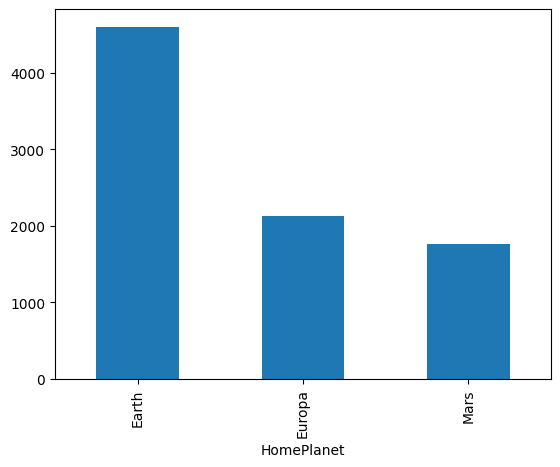

In [61]:
print(data["HomePlanet"].value_counts())
data["HomePlanet"].value_counts().plot(kind="bar")

CryoSleep
False    5439
True     3037
Name: count, dtype: int64


<Axes: xlabel='CryoSleep'>

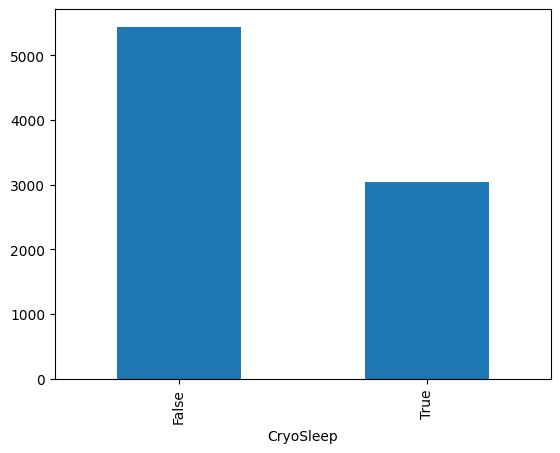

In [62]:
print(data["CryoSleep"].value_counts())
data["CryoSleep"].value_counts().plot(kind="bar")

In [63]:
print(data["Cabin"].value_counts())

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64


Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


<Axes: xlabel='Destination'>

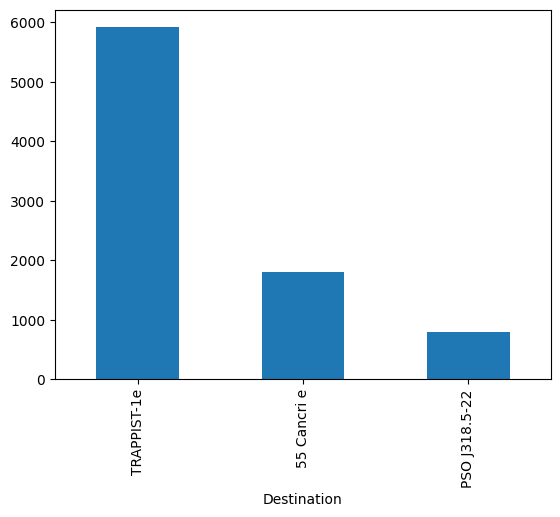

In [64]:
print(data["Destination"].value_counts())
data["Destination"].value_counts().plot(kind="bar")

VIP
False    8291
True      199
Name: count, dtype: int64


<Axes: xlabel='VIP'>

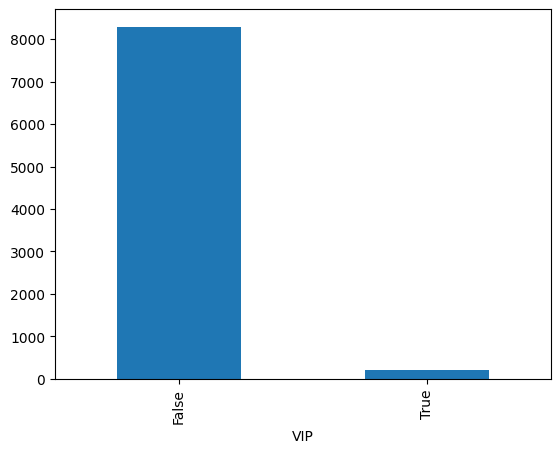

In [65]:
print(data["VIP"].value_counts())
data["VIP"].value_counts().plot(kind="bar")

Transported
True     4378
False    4315
Name: count, dtype: int64
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


<Axes: xlabel='Transported'>

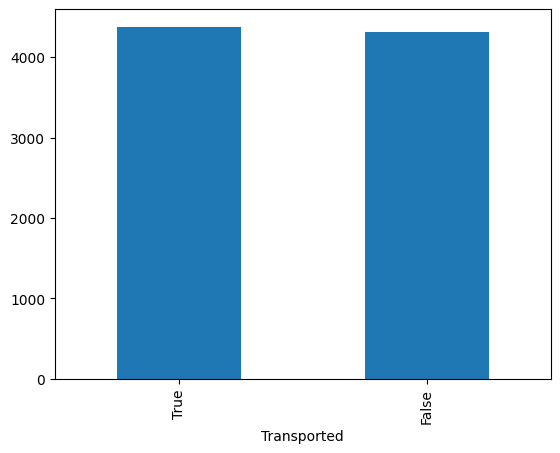

In [66]:
print(data["Transported"].value_counts())
print(data["Transported"].value_counts(normalize=True))
data["Transported"].value_counts().plot(kind="bar") # nearly perfectly balanced

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

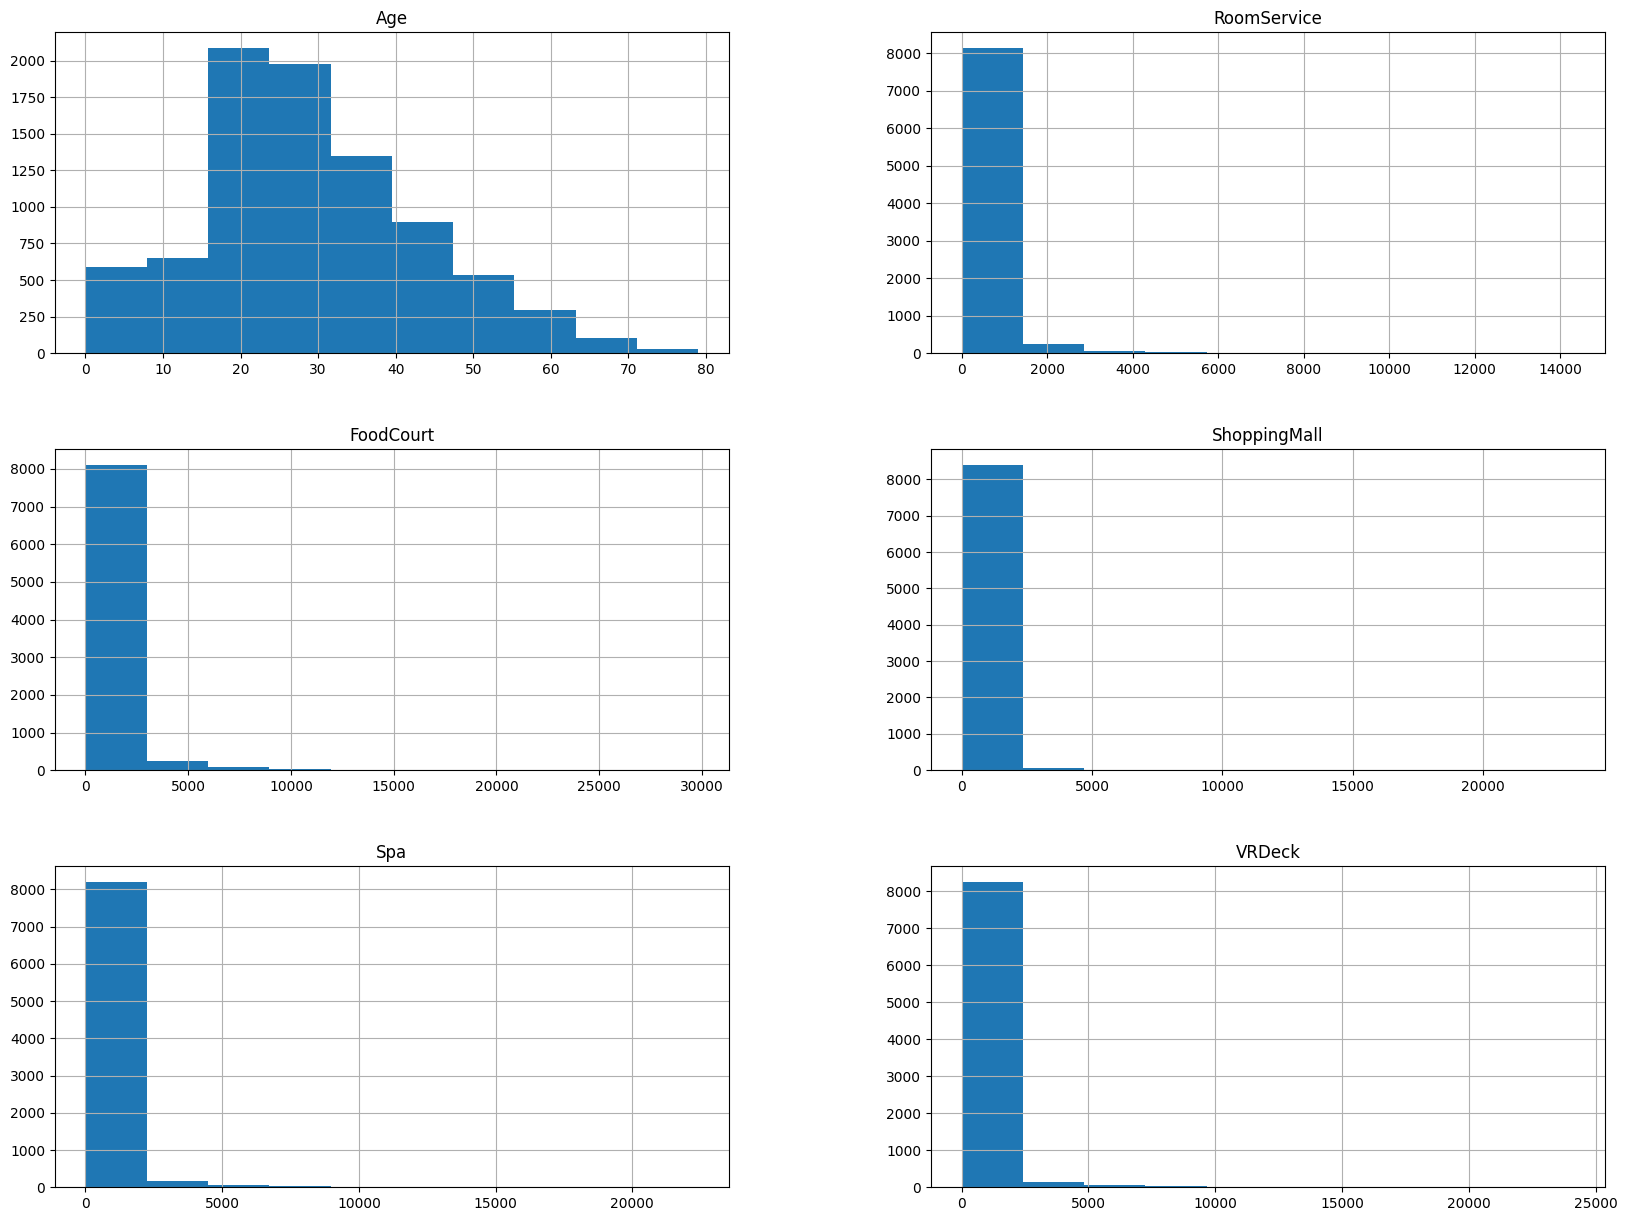

In [67]:
data.hist(figsize=(20,15))

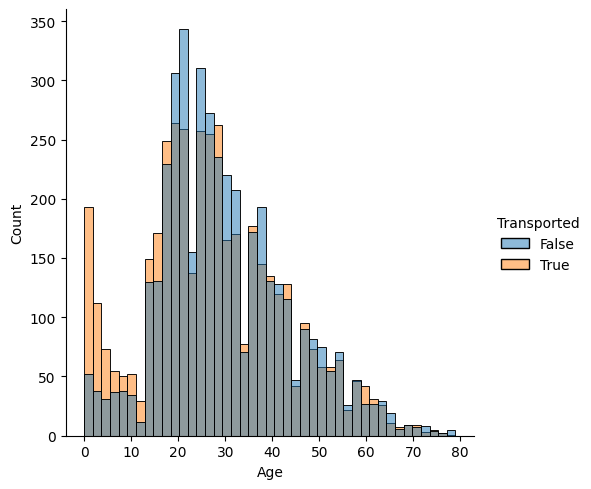

In [68]:
sns.displot(data, x="Age", hue="Transported")

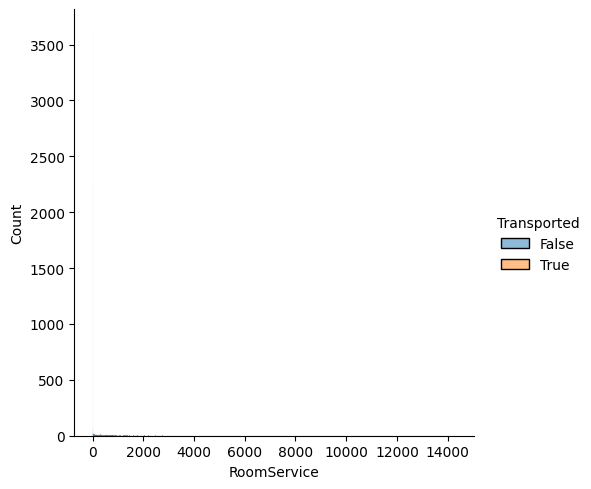

In [69]:
sns.displot(data, x="RoomService", hue="Transported")